In [339]:
from tqdm import tqdm
from qiskit import quantum_info
from qiskit.quantum_info import DensityMatrix, Statevector
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
#from qiskit_experiments.framework import ParallelExperiment
from qiskit_experiments.library import StateTomography
from qiskit.providers.aer import AerSimulator
from qiskit.providers.fake_provider import FakeParis
from numpy.linalg import norm 
import cvxpy
#set noisy simulator backend 
backend = AerSimulator.from_backend(FakeParis())
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Operator
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
#visualization
from qiskit.visualization import plot_state_city
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import Parameter
from qiskit.primitives import Estimator
from qiskit.quantum_info import SparsePauliOp
from qiskit.opflow import CircuitStateFn, PauliSumOp

In [337]:
# Step 1: Define operator

n=10
h=1
J=10
tau=0.1
m=0
layers=1

# Step 2: Define quantum state
qc = QuantumCircuit(n)
QuantumCircuit.initialize(qc,'0000000000',[0,1,2,3,4,5,6,7,8,9])
while m<layers:
    for i in range(n):
        qc.rx(tau*h,i)
    for j in range(n//2):
        qc.rzz(tau*J, 2*j,2*j+1)
    for j in range(n//2):
        if j == (n/2 - 1):
                break
        qc.rzz(tau*J, 2*j+1,2*j+2)
    qc.barrier(range(n))
    m+=1

estimator = Estimator() 
basis_gates=['cx', 'id', 'rz', 'x', 'sx']
qcc=transpile(qc, basis_gates=basis_gates, optimization_level=3)

In [341]:
dispcolors = {'cx':('#426299', '#000000'),
              'cswap':('#705399', '#000000'),
              'cp':('#CFFF8B', '#000000')}

qc.draw(output='mpl',style={'displaycolor':dispcolors}, filename='my_circuit.pdf')

options = Options(optimization_level=3)
options.execution.shots = 1024 
backend = AerSimulator.from_backend(FakeParis())
estimator = Estimator()

In [342]:

#observable = SparsePauliOp(["II", "XX", "YY", "ZZ"], coeffs=[1, 1, -1, 1])
op1 = SparsePauliOp("ZZIIII",coeffs=[1])
op2 = SparsePauliOp("IZZIII",coeffs=[1])
op3 = SparsePauliOp("IIIIZZ",coeffs=[1])


# for shot-based simulation:
expectation_value_1 = estimator.run(qcc, op1, shots=8000).result().values
expectation_value_3 = estimator.run(qcc, op2, shots=8000).result().values
expectation_value_6 = estimator.run(qcc, op3, shots=8000).result().values

print("expectation pos 1: ", expectation_value_1)
print("expectation pos 3: ", expectation_value_3)
print("expectation pos 6: ", expectation_value_6)


ValueError: The number of qubits of the 0-th circuit (10) does not match the number of qubits of the 0-th observable (6).

In [343]:
estimator = Estimator() 
#observable = SparsePauliOp(["II", "XX", "YY", "ZZ"], coeffs=[1, 1, -1, 1])
op1 = SparsePauliOp("ZZIIIIIIII",coeffs=[1])
op2 = SparsePauliOp("ZIIIIIIIII",coeffs=[1])
op3 = SparsePauliOp("IZIIIIIIII",coeffs=[1])

dist=1
# for shot-based simulation:
expectation_value_ij = estimator.run(qcc, op1, shots=8000).result().values
expectation_value_i = estimator.run(qcc, op2, shots=8000).result().values
expectation_value_j = estimator.run(qcc, op3, shots=8000).result().values
corr_ij1 = expectation_value_ij - expectation_value_i*expectation_value_j
print("expectation sigma_i*sigma_j: ", expectation_value_ij)
print("expectation sigma_i: ", expectation_value_i)
print("expectation sigma_j: ", expectation_value_j)
print("C_ij: ", corr_ij1)
#print("scaling 1/r^(1/4)", 1/dist**(1/4))

expectation sigma_i*sigma_j:  [0.98966433]
expectation sigma_i:  [0.99555485]
expectation sigma_j:  [0.99449899]
C_ij:  [-0.00041397]


In [344]:
op1 = SparsePauliOp("ZIZIIIIIII",coeffs=[1])
op2 = SparsePauliOp("ZIIIIIIIII",coeffs=[1])
op3 = SparsePauliOp("IIZIIIIIII",coeffs=[1])

dist=2
# for shot-based simulation:
expectation_value_ij = estimator.run(qcc, op1, shots=8000).result().values
expectation_value_i = estimator.run(qcc, op2, shots=8000).result().values
expectation_value_j = estimator.run(qcc, op3, shots=8000).result().values
corr_ij2 = expectation_value_ij - expectation_value_i*expectation_value_j
print("expectation sigma_i*sigma_j: ", expectation_value_ij)
print("expectation sigma_i: ", expectation_value_i)
print("expectation sigma_j: ", expectation_value_j)
print("C_ij: ", corr_ij2)
#print("scaling 1/r^(1/4)", 1/dist**(1/4))

expectation sigma_i*sigma_j:  [0.98733958]
expectation sigma_i:  [0.99624458]
expectation sigma_j:  [0.99389075]
C_ij:  [-0.00281869]


In [345]:
op1 = SparsePauliOp("ZIIZIIIIII",coeffs=[1])
op2 = SparsePauliOp("ZIIIIIIIII",coeffs=[1])
op3 = SparsePauliOp("IIIZIIIIII",coeffs=[1])

dist=3
# for shot-based simulation:
expectation_value_ij = estimator.run(qcc, op1, shots=8000).result().values
expectation_value_i = estimator.run(qcc, op2, shots=8000).result().values
expectation_value_j = estimator.run(qcc, op3, shots=8000).result().values
corr_ij3 = expectation_value_ij - expectation_value_i*expectation_value_j
print("expectation sigma_i*sigma_j: ", expectation_value_ij)
print("expectation sigma_i: ", expectation_value_i)
print("expectation sigma_j: ", expectation_value_j)
print("C_ij: ", corr_ij3)
#print("scaling 1/r^(1/4)", 1/dist**(1/4))

expectation sigma_i*sigma_j:  [0.98940291]
expectation sigma_i:  [0.9967716]
expectation sigma_j:  [0.99593703]
C_ij:  [-0.00331883]


In [346]:
op1 = SparsePauliOp("ZIIIZIIIII",coeffs=[1])
op2 = SparsePauliOp("ZIIIIIIIII",coeffs=[1])
op3 = SparsePauliOp("IIIIZIIIII",coeffs=[1])

dist=4
# for shot-based simulation:
expectation_value_ij = estimator.run(qcc, op1, shots=8000).result().values
expectation_value_i = estimator.run(qcc, op2, shots=8000).result().values
expectation_value_j = estimator.run(qcc, op3, shots=8000).result().values
corr_ij4 = expectation_value_ij - expectation_value_i*expectation_value_j
print("expectation sigma_i*sigma_j: ", expectation_value_ij)
print("expectation sigma_i: ", expectation_value_i)
print("expectation sigma_j: ", expectation_value_j)
print("C_ij: ", corr_ij4)
#print("scaling 1/r^(1/4)", 1/dist**(1/4))

expectation sigma_i*sigma_j:  [0.98791818]
expectation sigma_i:  [0.99386446]
expectation sigma_j:  [0.99416861]
C_ij:  [-0.00015068]


In [347]:
op1 = SparsePauliOp("ZIIIIZIIII",coeffs=[1])
op2 = SparsePauliOp("ZIIIIIIIII",coeffs=[1])
op3 = SparsePauliOp("IIIIIZIIII",coeffs=[1])

dist=5
# for shot-based simulation:
expectation_value_ij = estimator.run(qcc, op1, shots=8000).result().values
expectation_value_i = estimator.run(qcc, op2, shots=8000).result().values
expectation_value_j = estimator.run(qcc, op3, shots=8000).result().values
corr_ij5 = expectation_value_ij - expectation_value_i*expectation_value_j
print("expectation sigma_i*sigma_j: ", expectation_value_ij)
print("expectation sigma_i: ", expectation_value_i)
print("expectation sigma_j: ", expectation_value_j)
print("C_ij: ", corr_ij5)
#print("scaling 1/r^(1/4)", 1/dist**(1/4))

expectation sigma_i*sigma_j:  [0.99187954]
expectation sigma_i:  [0.99603257]
expectation sigma_j:  [0.99623932]
C_ij:  [-0.00040727]


In [348]:
op1 = SparsePauliOp("ZIIIIIZIII",coeffs=[1])
op2 = SparsePauliOp("ZIIIIIIIII",coeffs=[1])
op3 = SparsePauliOp("IIIIIIZIII",coeffs=[1])

dist=6
# for shot-based simulation:
expectation_value_ij = estimator.run(qcc, op1, shots=8000).result().values
expectation_value_i = estimator.run(qcc, op2, shots=8000).result().values
expectation_value_j = estimator.run(qcc, op3, shots=8000).result().values
corr_ij6 = expectation_value_ij - expectation_value_i*expectation_value_j
print("expectation sigma_i*sigma_j: ", expectation_value_ij)
print("expectation sigma_i: ", expectation_value_i)
print("expectation sigma_j: ", expectation_value_j)
print("C_ij: ", corr_ij6)
#print("scaling 1/r^(1/4)", 1/dist**(1/4))

expectation sigma_i*sigma_j:  [0.98936094]
expectation sigma_i:  [0.99422506]
expectation sigma_j:  [0.99318064]
C_ij:  [0.00191586]


In [349]:
op1 = SparsePauliOp("ZIIIIIIZII",coeffs=[1])
op2 = SparsePauliOp("ZIIIIIIIII",coeffs=[1])
op3 = SparsePauliOp("IIIIIIIZII",coeffs=[1])

dist=7
# for shot-based simulation:
expectation_value_ij = estimator.run(qcc, op1, shots=8000).result().values
expectation_value_i = estimator.run(qcc, op2, shots=8000).result().values
expectation_value_j = estimator.run(qcc, op3, shots=8000).result().values
corr_ij7 = expectation_value_ij - expectation_value_i*expectation_value_j
print("expectation sigma_i*sigma_j: ", expectation_value_ij)
print("expectation sigma_i: ", expectation_value_i)
print("expectation sigma_j: ", expectation_value_j)
print("C_ij: ", corr_ij7)
#print("scaling 1/r^(1/4)", 1/dist**(1/4))

expectation sigma_i*sigma_j:  [0.99047308]
expectation sigma_i:  [0.99389663]
expectation sigma_j:  [0.99326564]
C_ij:  [0.0032697]


In [350]:
op1 = SparsePauliOp("ZIIIIIIIZI",coeffs=[1])
op2 = SparsePauliOp("ZIIIIIIIII",coeffs=[1])
op3 = SparsePauliOp("IIIIIIIIZI",coeffs=[1])

dist=8
# for shot-based simulation:
expectation_value_ij = estimator.run(qcc, op1, shots=8000).result().values
expectation_value_i = estimator.run(qcc, op2, shots=8000).result().values
expectation_value_j = estimator.run(qcc, op3, shots=8000).result().values
corr_ij8 = expectation_value_ij - expectation_value_i*expectation_value_j
print("expectation sigma_i*sigma_j: ", expectation_value_ij)
print("expectation sigma_i: ", expectation_value_i)
print("expectation sigma_j: ", expectation_value_j)
print("C_ij: ", corr_ij8)
#print("scaling 1/r^(1/4)", 1/dist**(1/4))

expectation sigma_i*sigma_j:  [0.99136676]
expectation sigma_i:  [0.99549797]
expectation sigma_j:  [0.99383858]
C_ij:  [0.00200248]


In [351]:
op1 = SparsePauliOp("ZIIIIIIIIZ",coeffs=[1])
op2 = SparsePauliOp("ZIIIIIIIII",coeffs=[1])
op3 = SparsePauliOp("IIIIIIIIIZ",coeffs=[1])

dist=9
# for shot-based simulation:
expectation_value_ij = estimator.run(qcc, op1, shots=8000).result().values
expectation_value_i = estimator.run(qcc, op2, shots=8000).result().values
expectation_value_j = estimator.run(qcc, op3, shots=8000).result().values
corr_ij9 = expectation_value_ij - expectation_value_i*expectation_value_j
print("expectation sigma_i*sigma_j: ", expectation_value_ij)
print("expectation sigma_i: ", expectation_value_i)
print("expectation sigma_j: ", expectation_value_j)
print("C_ij: ", corr_ij9)
#print("scaling 1/r^(1/4)", 1/dist**(1/4))

expectation sigma_i*sigma_j:  [0.99088441]
expectation sigma_i:  [0.99555605]
expectation sigma_j:  [0.99496722]
C_ij:  [0.00033878]


In [352]:
corr_ij_dict = {}
for f in range(1, n):
    corr_ij_dict[f] = globals().get(f"corr_ij{f}")

# Convert the dictionary values to a NumPy array
correlations = np.array(list(corr_ij_dict.values()))
distances=np.array([i for i in range(1,n)], dtype=float)

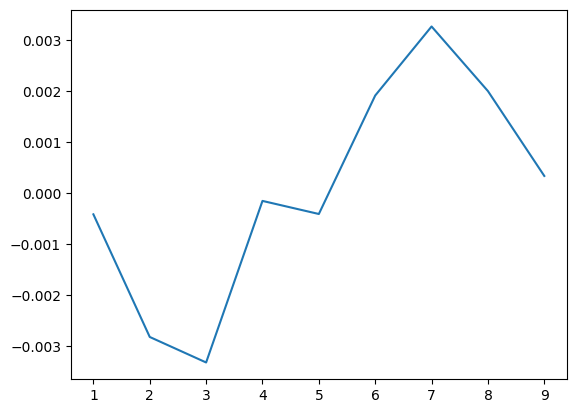

In [353]:
plt.plot(distances, correlations)

In [302]:
from scipy.optimize import curve_fit


def my_curve_function(x, a, b):
    return a*x**2+b*x

params, covariance = curve_fit(my_curve_function, distances, correlations)

ValueError: object too deep for desired array

error: Result from function call is not a proper array of floats.

In [293]:
print(my_curve_function(distances, 2))

[1.         0.25       0.11111111 0.0625     0.04       0.02777778
 0.02040816 0.015625   0.01234568]


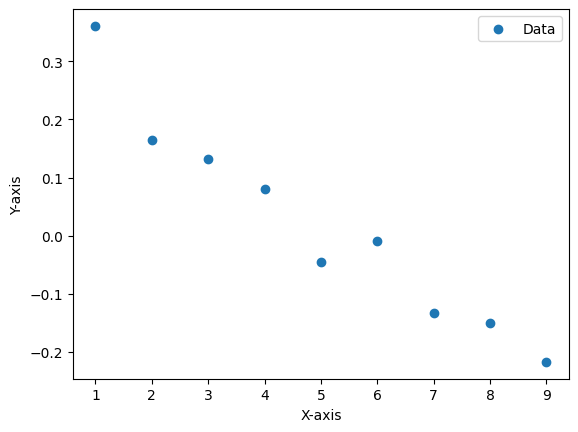

In [354]:
plt.scatter(x, y, label='Data')
#plt.plot(x, fitted_curve, label='Fitted Curve', color='red')
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [287]:
distances

array([1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [296]:
print(correlations.dtype)

float64
